In [1]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
%matplotlib inline

os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [2]:
IMAGE_PATH = "../sample_images/monkey.png"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [15]:
def save_image(image, filename):
    """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save to.
    """
    if not isinstance(image, Image.Image):
        image = tf.clip_by_value(image, 0, 255)
        image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
    image.save(f'{filename}.jpg')
    print(f'Saved as {filename}.jpg')

In [4]:
def plot_image(image, title=""):
    """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
    """
    image = np.asarray(image)
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
    plt.imshow(image)
    plt.axis("off")
    plt.title(title)

In [5]:
import cv2


lr_image = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
lr_image.shape

(120, 125, 3)

Saved as Original Image.jpg


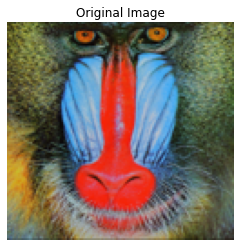

In [6]:
# Plotting Original Resolution image
plot_image(lr_image, title="Original Image")

new im shape (1, 480, 496, 3)


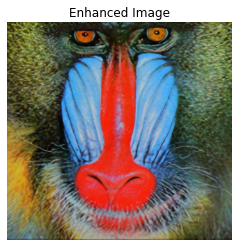

In [12]:
from esrgan import ESRGAN


model = ESRGAN()
model.load()
lr_images = [lr_image]

for i, im in enumerate(model.enhance(lr_images)):
    print('new im shape', im.shape)
    im = tf.squeeze(im)
#     print('psnr', tf.image.psnr(lr_images[i], im, max_val=255))
    plot_image(tf.squeeze(im), title="Enhanced Image")